In [418]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [15, 7.5]

# **Реализация агоритма KMeans**

In [546]:
# mas - начальный массив точек, a - начальное расположение центроидов кластера
def My_Kmeans(a, mas=np.array([[5,5]])):
    b = a.copy()
    num_chis = (mas.shape)[0]
    k = (a.shape)[0]
    klasters = np.zeros(num_chis) # какому кластеру принадлежит каждая точка
    klasters = klasters.astype('int32')
    len = np.zeros((num_chis, k))
    while(True):
        for i in range(num_chis):
            for j in range(k):
                len[i,j] = np.sqrt(np.sum((mas[i]-a[j])**2))
            klasters[i] = np.argmin(len[i])
        for i in range(k):
            elem_num = np.sum([klasters[j] == i for j in range(num_chis)])
            elem_sum = np.sum([mas[j] * (klasters[j] == i) for j in range(num_chis)], axis=0)
            if(elem_num != 0):
                b[i] = elem_sum / (elem_num)
        if(np.array_equal(a,b)):
            break
        a = b.copy()   
    return(klasters, a)
    

## Функции для красивого вывода

In [547]:
def pictures(mas = np.array([[5,5]]), num=1, nach=[[0, 0]]):
    if(np.array_equal(nach, [[0, 0]])):
        nach = np.random.rand(num, 2)*10
    # picture 1
    plt.subplot (1, 2, 1)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:,0], mas[:,1], c='black')
    plt.scatter(nach[:, 0], nach[:,1], c='red')
    plt.title("Точки")
    
    klasters, b = My_Kmeans(nach, mas)
    
    # picture 2
    plt.subplot (2, 4, 3)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:, 0], mas[:,1], c=klasters)
    plt.scatter(b[:, 0], b[:,1], c='red')
    plt.title("Своя реализация")
    
    # picture 3
    a=KMeans(n_clusters=num, random_state=0).fit_predict(mas)
    plt.subplot (2, 4, 7)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:, 0], mas[:,1], c=a)
    plt.title("Реализация из библиотеки")

In [661]:
def timing(mas = np.array([[5,5]]), num=1, nach=[[0, 0]]):
    if(np.array_equal(nach, [[0, 0]])):
        nach = np.random.rand(num, 2)*10
    # picture 1
    plt.subplot (1, 2, 1)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:,0], mas[:,1], c='black')
    plt.scatter(nach[:, 0], nach[:,1], c='red')
    plt.title("Точки")
    print('Собственная реализация алгоритма:\n')
    %timeit klasters, b = My_Kmeans(nach, mas)
    
    klasters, b = My_Kmeans(nach, mas)
    
    # picture 2
    plt.subplot (2, 4, 3)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:, 0], mas[:,1], c=klasters)
    plt.scatter(b[:, 0], b[:,1], c='red')
    plt.title("Своя реализация")
    
    # picture 3
    print('\nАлгоритм из библиотеки:\n')
    %timeit a=KMeans(n_clusters=num, random_state=0).fit_predict(mas)
    a=KMeans(n_clusters=num, random_state=0).fit_predict(mas)
    plt.subplot (2, 4, 7)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:, 0], mas[:,1], c=a)
    plt.title("Реализация из библиотеки")

# **Зависимость от стратегии начальной инициализации**

Будем исследовать зависимость кластеризации для одних и тех же начальных данных от начального состояния (количества кластеров и их расположения):

В рандомной начальной инициализации иногда происходит так, что в начальном кластере нет ни одного элемента, и он остается там где был:

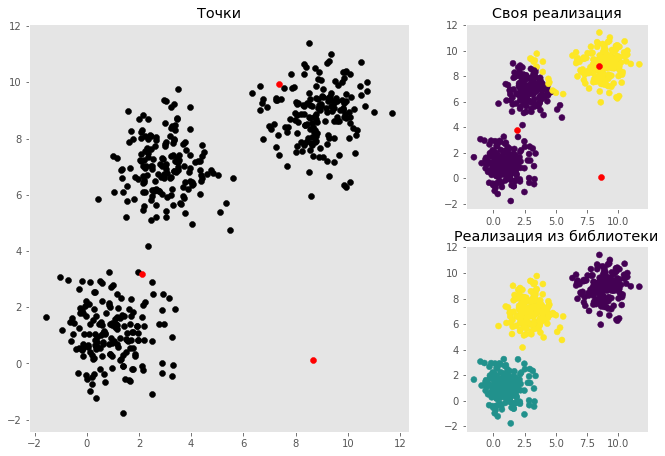

In [578]:
x1, y = make_blobs(n_samples=500, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 10))
pictures(x1, 3)

Можно задавать точки около центра масс, тогда вероятность того, что у точки не будет ближайших к ней элементов, мала, если мы правильно определили число кластеров:

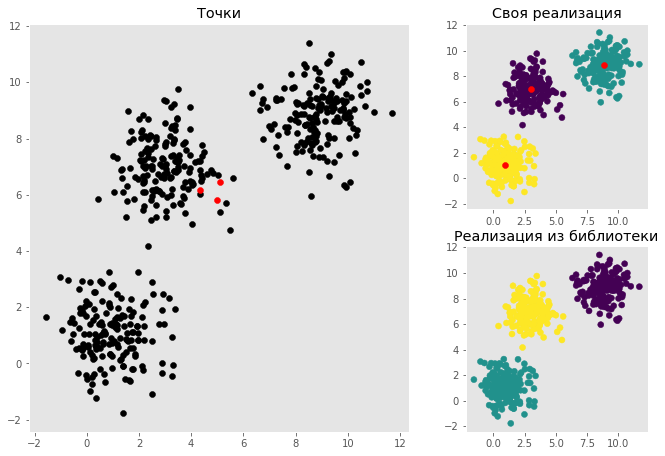

In [579]:
elem_num = (x1.shape)[0]
elem_sum = np.sum([x1[j] for j in range((x1.shape)[0])], axis=0)
a=np.zeros((3, 2))
for i in range(3):
    a[i][0] = (elem_sum / (elem_num))[0]
    a[i][1] = (elem_sum / (elem_num))[1]
    a[i]+= np.random.rand(2)
pictures(x1, 3, a)

In [580]:
x2, y = make_blobs(n_samples=100, n_features=2, centers=[[1,1],[9,9], [1, 9], [9, 1]], random_state=0, center_box = (0, 10))

Однако если предполагаемое число кластеров слишком велико, проблема остается (видно, что образовалось всего 4 кластера вместо 10, остальные по-прежнему находятся в центре):

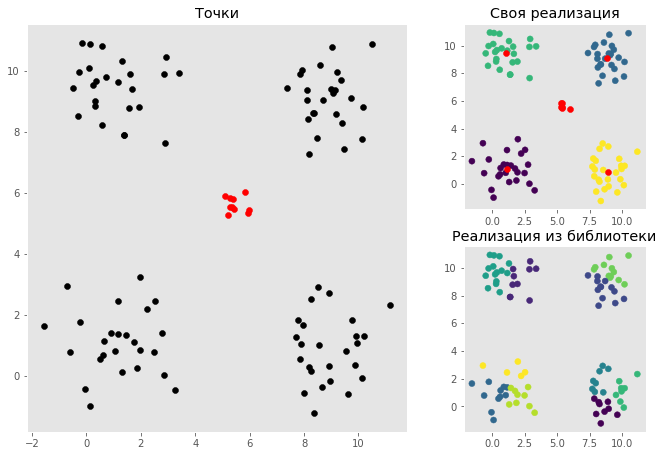

In [583]:
elem_num = (x2.shape)[0]
elem_sum = np.sum([x2[j] for j in range((x2.shape)[0])], axis=0)
a=np.zeros((10, 2))
for i in range(10):
    a[i] = (elem_sum / (elem_num))
    a[i]+=np.random.rand(2)
pictures(x2, 10, a)

Рандомное распределение точек при этом работает лучше, в среднем неиспользованными остаются одна-две точки:

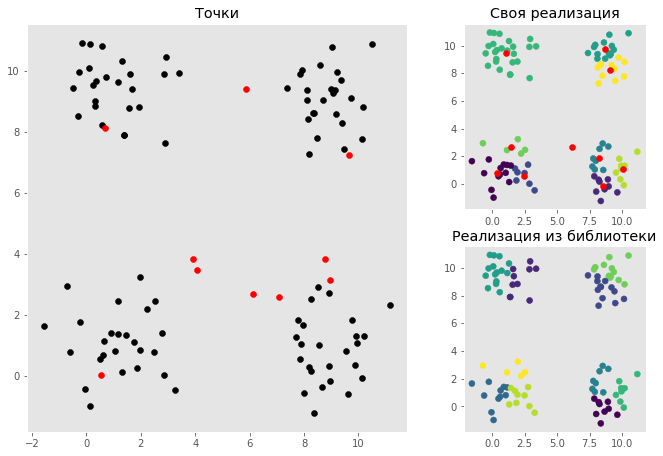

In [594]:
pictures(x2, 10)

Вероятным решением проблемы является не оставлять точку где она есть, а перемещать ее снова в рандомное место, если в соответствующем кластере нет ни одной точки. Кроме того можно использовать это свойство, поскольку если точки хорошо разнесены как на картинке выше, то можно найти где сильно возрастает вероятность получения пустых кластеров, и использовать это как ограничение на число кластеров

# **Для каких задач подходит**

### Исследуем различные начальные данные

Алгоритм хорошо работает на кластерах удаленных друг от друга и имеющих форму круга:

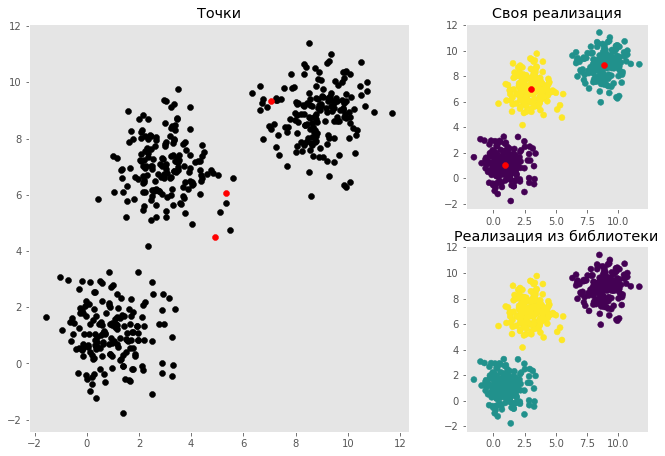

In [623]:
x_round, y = make_blobs(n_samples=500, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 2))
pictures(x_round, 3)

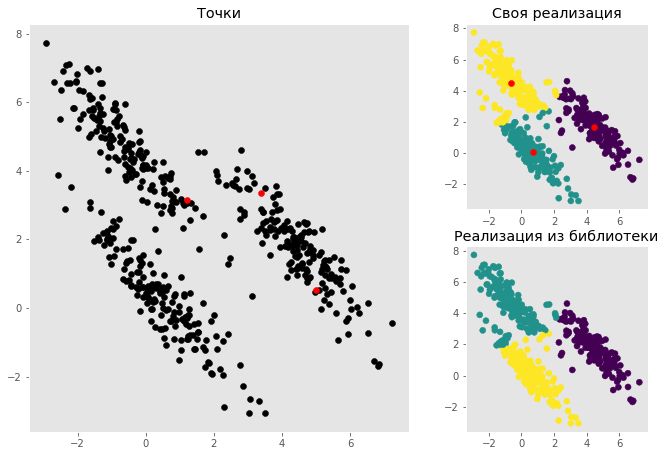

In [640]:
x_not_round, y = make_blobs(n_samples=500, n_features=2, centers=[[1,1],[9,9], [3,7]], random_state=0, center_box = (0, 10))
x_not_round = np.dot(x_not_round, [[1, -0.8], [-0.5, 1]])
pictures(x_not_round, 3)

При одинаковом распределении ожидаемо отсекаются примерно равные по площади части:

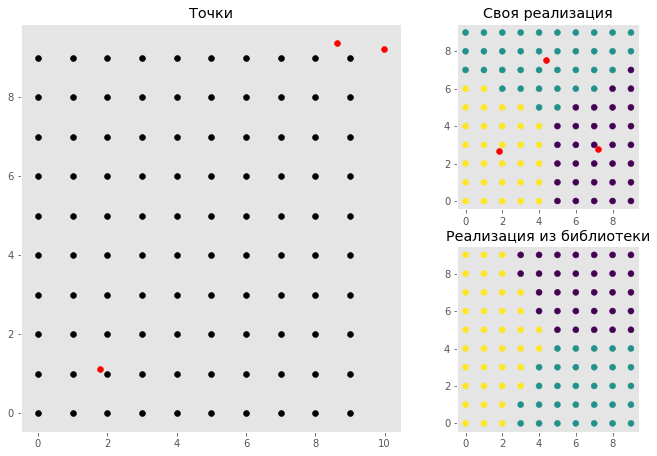

In [600]:
x_diskr = np.zeros((100, 2))
for i in range(10):
    for j in range(10):
        x_diskr[i*10+j] = [i,j]
pictures(x_diskr, 3)

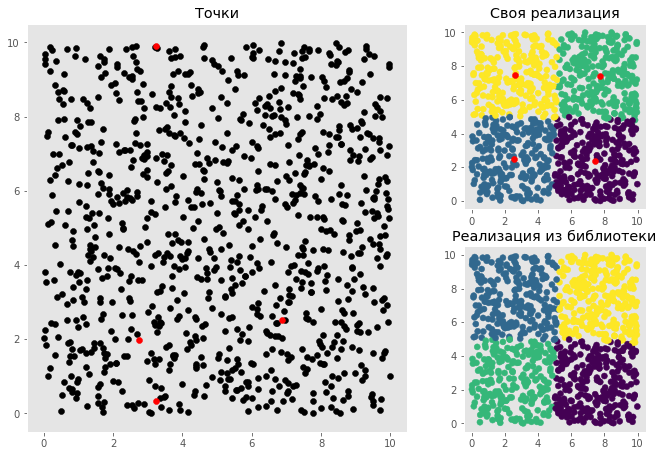

In [604]:
x_rand = np.random.rand(1000, 2)*10
pictures(x_rand, 4)

# **Зависимость скорости настройки от объема данных** 

Зависимость от количества точек: в собственном алгоритме скорость изменяется почти в столько же раз, во сколько и даные, в библиотечном почти не меняется

Собственная реализация алгоритма:

42.7 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Алгоритм из библиотеки:

22.6 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


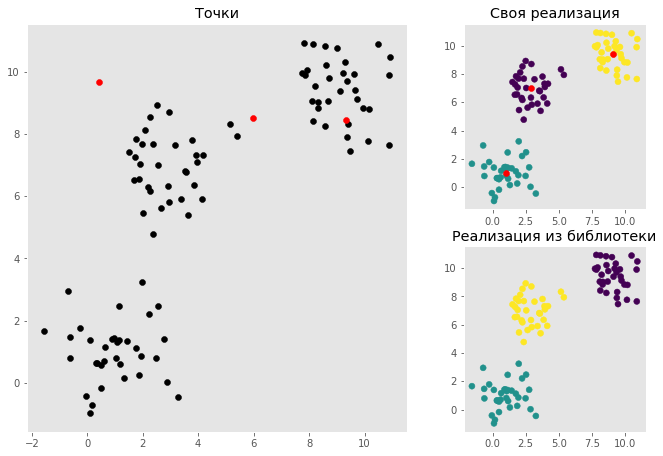

In [666]:
x_data_1, y = make_blobs(n_samples=100, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 2)) 
timing(x_data_1, 3)

Собственная реализация алгоритма:

594 ms ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Алгоритм из библиотеки:

27 ms ± 7.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


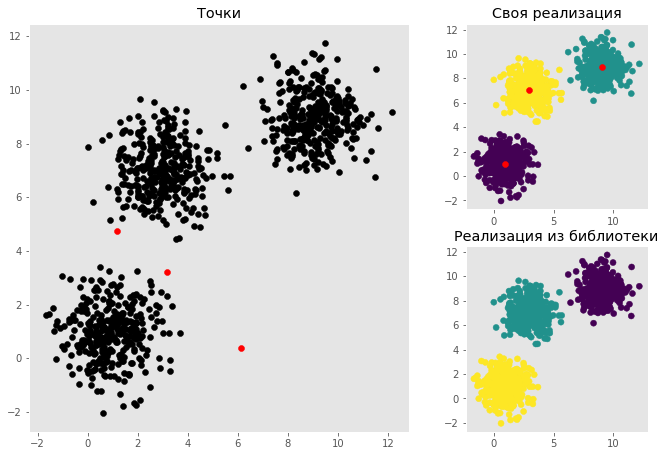

In [667]:
x_data_2, y = make_blobs(n_samples=1000, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 2)) 
timing(x_data_2, 3)

При увеличении начального числа кластеров время работы собственного алгоритма также значительно возрастает, как и время работы библиотечного алгоритма

Собственная реализация алгоритма:

2.35 s ± 586 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Алгоритм из библиотеки:

60.1 ms ± 8.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


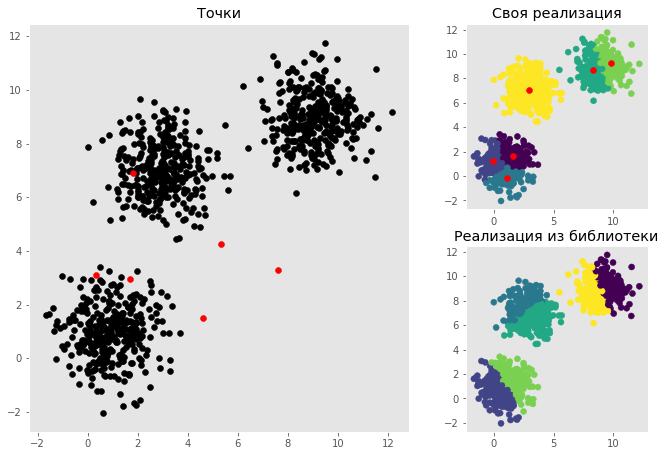

In [676]:
x_data_3, y = make_blobs(n_samples=1000, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 2)) 
timing(x_data_3, 6)

# **Визуализация матрицы попарных расстояний**

In [694]:
def matr_len(mas = np.array([[5,5]]), num=1, nach=[[0, 0]]):
    if(np.array_equal(nach, [[0, 0]])):
        nach = np.random.rand(num, 2)*10
    # picture 1
    plt.subplot (1, 2, 1)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:,0], mas[:,1], c='black')
    plt.scatter(nach[:, 0], nach[:,1], c='red')
    plt.title("Точки")
    
    klasters, b = My_Kmeans(nach, mas)
    
    # picture 2
    plt.subplot (2, 4, 3)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:, 0], mas[:,1], c=klasters)
    plt.scatter(b[:, 0], b[:,1], c='red')
    plt.title("Своя реализация")
    
    # picture 3
    a=KMeans(n_clusters=num, random_state=0).fit_predict(mas)
    plt.subplot (2, 4, 7)
    x=np.linspace(-1, 11, 400)
    plt.grid()
    plt.scatter(mas[:, 0], mas[:,1], c=a)
    plt.title("Реализация из библиотеки")
    
    #visualisation
    num_chis = (mas.shape)[0]
    num_klast = num
    len_0 = np.zeros((num_chis, num_chis))
    len_1 = np.zeros((num_chis, num_chis))
    for i in range(num_chis):
        for j in range(num_chis):
            len_0[i,j] = np.sqrt(np.sum((mas[i]-mas[j])**2))
    tek = 0
    mas_sorted = np.zeros((num_chis, 2))
    for i in range(num_klast):
        for j in range(num_chis):
             if(klasters[j] == i):
                 mas_sorted[tek] = mas[j]
                 tek+=1
    for i in range(num_chis):
        for j in range(num_chis):
            len_1[i,j] = np.sqrt(np.sum((mas_sorted[i]-mas_sorted[j])**2))
    fig, ax = plt.subplots()
    ax.pcolormesh(len_0)
    fig.set_figwidth(8)
    fig.set_figheight(8)
    fig, ax = plt.subplots()
    ax.pcolormesh(len_1)
    fig.set_figwidth(8)
    fig.set_figheight(8)

    

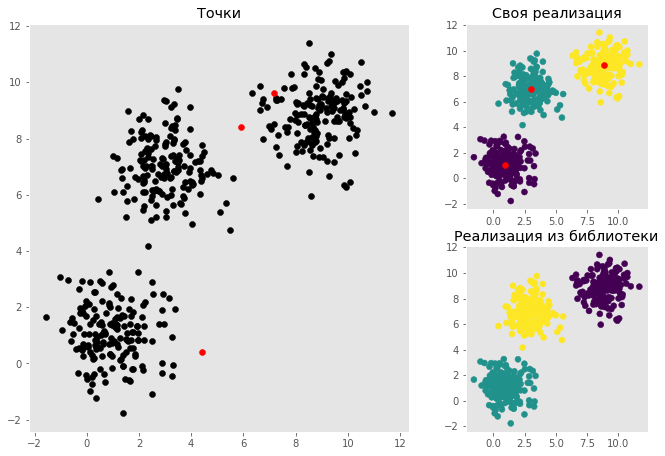

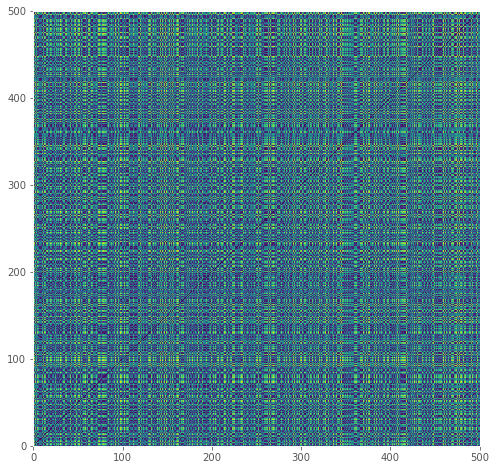

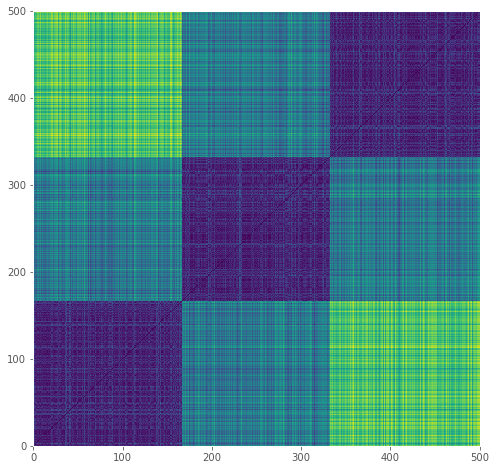

In [707]:
x_norm, y = make_blobs(n_samples=500, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 2))
matr_len(x_norm, 3)

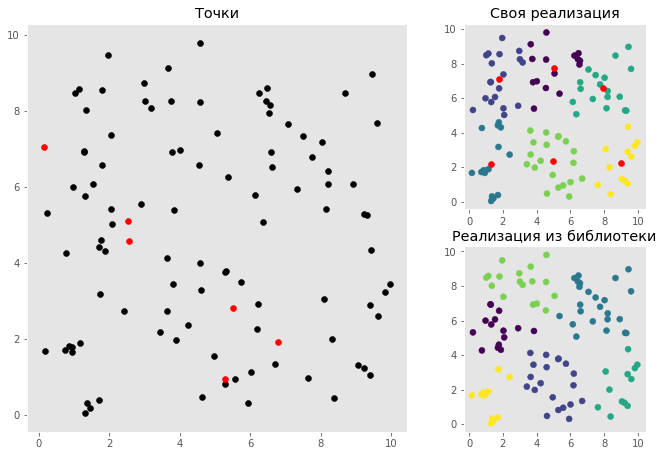

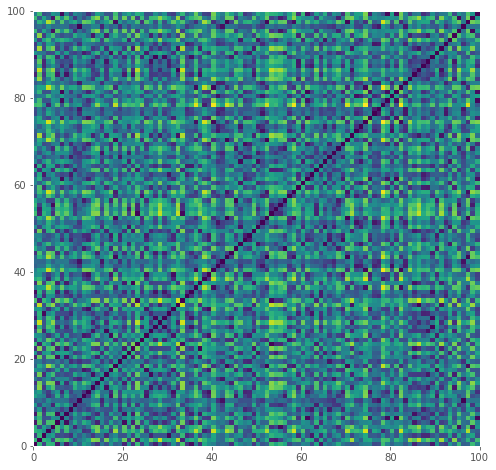

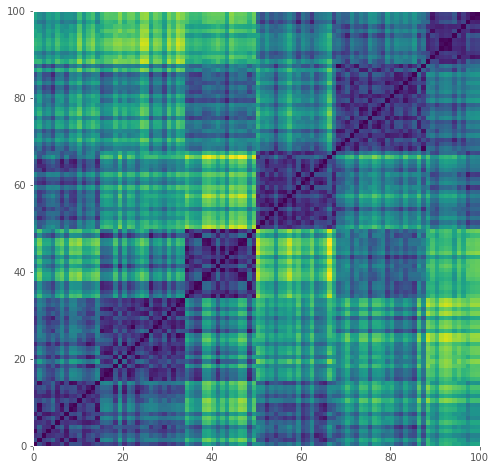

In [700]:
x_raspr= np.random.rand(100, 2)*10
matr_len(x_raspr, 6)

# **Стратегия выбора числа кластеров**

Можно воспользоваться предположением из пункта о зависимости от стратегии начальной инициализации, где говорилось что если разместить начальные точки почти в центре масс и если исследуемые точки хорошо разнесены,то можно найти где возрастает вероятность получения пустых кластеров, и использовать это как ограничение на число кластеров. 


Создаем функцию, где будем по неспоклько раз делать кластеризацию и проверять, нет ли пустых кластеров. Если есть, то предыдущее количество кластеров, возможно, является оптимальным

In [815]:
# mas - начальный массив точек, stop - максимальное предполагаемое число кластеров, iter - число проверок
def choise(mas = [[5,5]], stop = 10, iter = 100):
    p=np.zeros(stop)
    if(stop <=1):
        return(stop)
    elem_num = (mas.shape)[0]
    elem_sum = np.sum([mas[j] for j in range((mas.shape)[0])], axis=0)
    for i in range(2, stop+1):
        a=np.zeros((i, 2)) 
        for j in range(iter):
            for z in range(i):
                a[z] = (elem_sum / (elem_num))
                a[z]+= np.random.rand(2)
            klasters, b = My_Kmeans(a, mas)
            for z in range(i):
                t = np.sum([klasters[r] == z for r in range((mas.shape)[0])])
                if(t == 0):
                    p[i-1]+=1
                    break
        p[i-1] = p[i-1] / iter
    print('\nМассив вероятностей: \n',p)
    sootn=np.zeros(stop-1) 
    # считаем соотношение соседних вероятностей, если левая 0 то пусть будет p[i]/0.001
    for i in range(stop-1):
        if(p[i] == 0):
            sootn[i] = 0
        else:
            if(p[i-1] !=0):
                sootn[i] = p[i]/p[i-1]
            else:
                sootn[i]=p[i]/0.001
    print('\nСоотношение между вероятностями: \n', sootn)
    
    m=np.argmax(sootn)
    
    if(np.max(sootn) < 10):
        return(m+1)
    else:
        return(m)
    print("Не удалось определить число кластеров")
    return(1)


Массив вероятностей: 
 [0.    0.    0.001 0.012 0.017]

Соотношение между вероятностями: 
 [ 0.  0.  1. 12.]
Предполагаемое число кластеров: 3


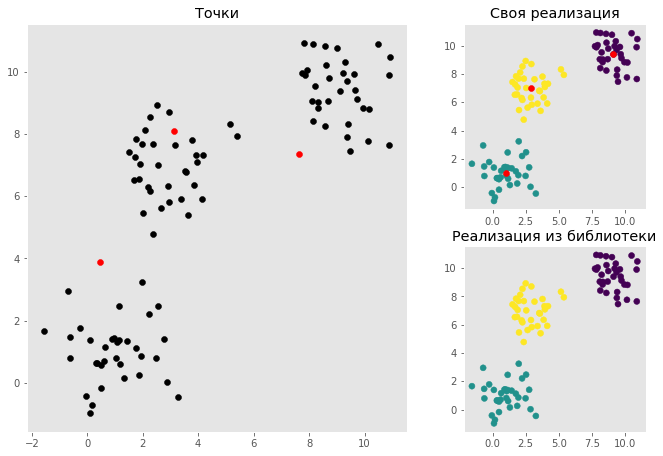

In [820]:
x_choise, y = make_blobs(n_samples=100, n_features=2, centers=[[1,1],[9,9], [3, 7]], random_state=0, center_box = (0, 2))
t = choise(x_choise, 5, 1000)
print("Предполагаемое число кластеров:", t)
pictures(x_choise, t)

Метод не был проверен на данных других типов, и неточен.
Кроме того, из-за необходимости считать вероятность он работает очень долго